In [48]:
import numpy as np
from sklearn.metrics import normalized_mutual_info_score

from cluster import *
from graphs.dataset import *
from measure.kernel import *
from tqdm import tqdm_notebook as tqdm

import matplotlib.pyplot as plt
%matplotlib inline

A Jupyter Widget

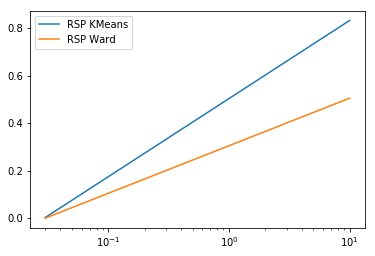

In [57]:
graphs, info = news_2cl_1
A, labels_true = graphs[0]
measure = RSP_K(A)

results_kmeans, results_ward = [], []
for param in tqdm([0.03, 10]):

# for param in tqdm(np.logspace(-2, np.log10(30), 20)):
    K = measure.get_K(param)
    labels_pred_kmeans = KernelKMeans(n_clusters=info['k'], max_iter=5000, random_state=8).fit_predict(K)
    labels_pred_ward = Ward(n_clusters=info['k']).predict(K)
    nmi_kmeans = normalized_mutual_info_score(labels_true, labels_pred_kmeans)
    nmi_ward = normalized_mutual_info_score(labels_true, labels_pred_ward)
    results_kmeans.append((param, nmi_kmeans))
    results_ward.append((param, nmi_ward))

results_kmeans = np.array(results_kmeans)
results_ward = np.array(results_ward)

plt.semilogx(results_kmeans[:, 0], results_kmeans[:, 1], label='RSP KMeans')
plt.semilogx(results_ward[:, 0], results_ward[:, 1], label='RSP Ward')
plt.legend()

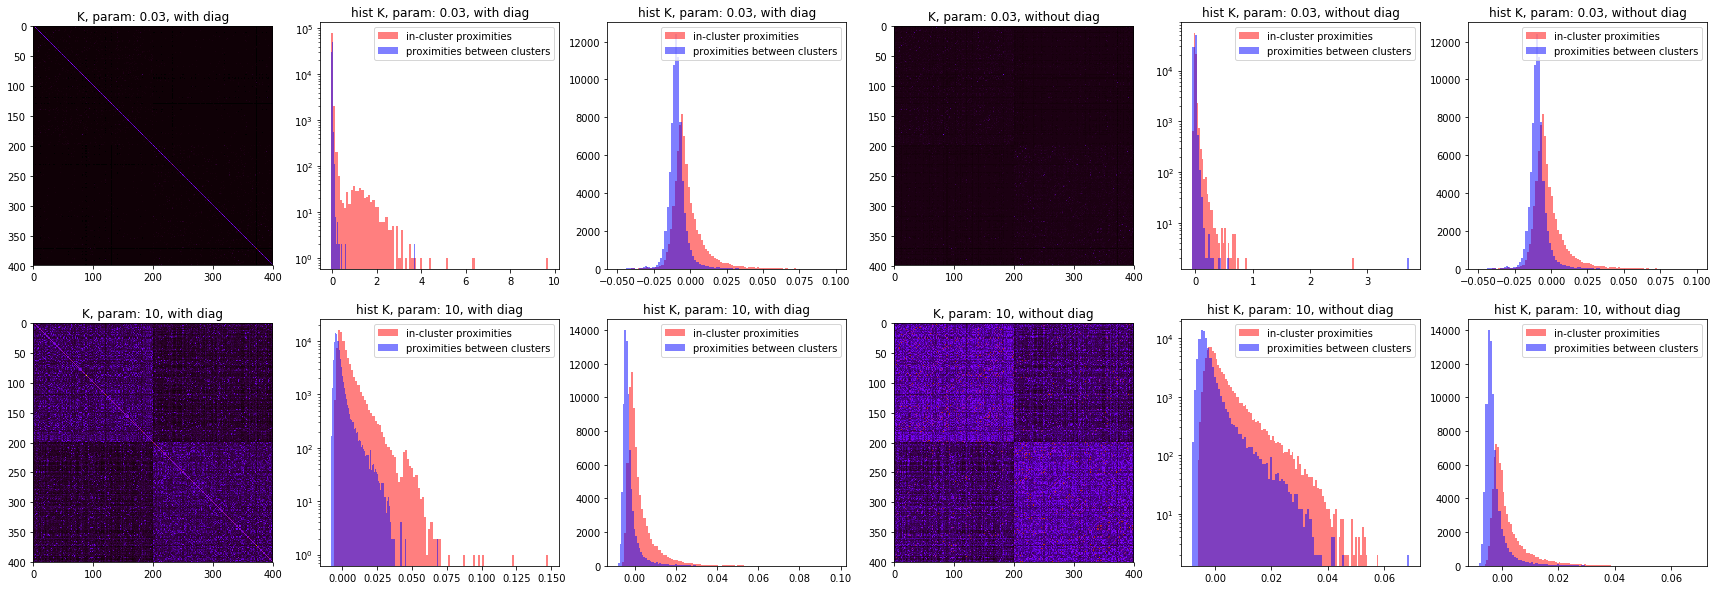

In [113]:
fig, ax = plt.subplots(2, 6, figsize=[30, 10])
for idx, param in enumerate([0.03, 10]):
    K = measure.get_K(param)
    K14 = K[:200, :200].ravel().tolist() + K[200:, 200:].ravel().tolist()
    K23 = K[:200, 200:].ravel().tolist() + K[200:, :200].ravel().tolist()
    
    ax[idx][0].imshow(K, cmap='gnuplot', interpolation='nearest')
    ax[idx][0].set_title('K, param: {}, with diag'.format(param))
    
    ax[idx][1].hist(K14, bins=100, fc=(1, 0, 0, 0.5), label='in-cluster proximities')
    ax[idx][1].hist(K23, bins=100, fc=(0, 0, 1, 0.5), label='proximities between clusters')
    ax[idx][1].legend()
    ax[idx][1].set_yscale("log")
    ax[idx][1].set_title('hist K, param: {}, with diag'.format(param))
    ax[idx][2].hist([x for x in K14 if -0.05 < x < 0.1], bins=100, fc=(1, 0, 0, 0.5), label='in-cluster proximities')
    ax[idx][2].hist([x for x in K23 if -0.05 < x < 0.1], bins=100, fc=(0, 0, 1, 0.5), label='proximities between clusters')
    ax[idx][2].set_title('hist K, param: {}, with diag'.format(param))
    ax[idx][2].legend()
    
    for i in range(400):
        K[i, i] = 0
    K14 = K[:200, :200].ravel().tolist() + K[200:, 200:].ravel().tolist()
    K23 = K[:200, 200:].ravel().tolist() + K[200:, :200].ravel().tolist()
    
    ax[idx][3].imshow(K, cmap='gnuplot', interpolation='nearest')
    ax[idx][3].set_title('K, param: {}, without diag'.format(param))
    
    ax[idx][4].hist(K14, bins=100, fc=(1, 0, 0, 0.5), label='in-cluster proximities')
    ax[idx][4].hist(K23, bins=100, fc=(0, 0, 1, 0.5), label='proximities between clusters')
    ax[idx][4].legend()
    ax[idx][4].set_yscale("log")
    ax[idx][4].set_title('hist K, param: {}, without diag'.format(param))
    ax[idx][5].hist([x for x in K14 if -0.05 < x < 0.1], bins=100, fc=(1, 0, 0, 0.5), label='in-cluster proximities')
    ax[idx][5].hist([x for x in K23 if -0.05 < x < 0.1], bins=100, fc=(0, 0, 1, 0.5), label='proximities between clusters')
    ax[idx][5].set_title('hist K, param: {}, without diag'.format(param))
    ax[idx][5].legend()

plt.show()

In [ ]:
graphs, info = news_2cl_1
A, labels_true = graphs[0]
measure = FE_K(A)

results = []
for param in tqdm(np.logspace([0.1]):
    K = measure.get_K(param)
    labels_pred = KernelKMeans(n_clusters=info['k'], max_iter=5000, random_state=8).fit_predict(K)
    nmi = normalized_mutual_info_score(labels_true, labels_pred)
    results.append((param, nmi))

results = np.array(results)
plt.semilogx(results[:, 0], results[:, 1], label='FE')
plt.legend()

A Jupyter Widget

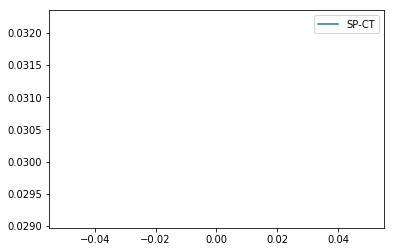

In [23]:
graphs, info = news_2cl_1
A, labels_true = graphs[0]
measure = SPCT_H(A)

results = []
for param in tqdm(np.linspace(0, 1, 100)):
    K = measure.get_K(param)
    labels_pred = KernelKMeans(n_clusters=info['k'], max_iter=5000, random_state=8).fit_predict(K)
    nmi = normalized_mutual_info_score(labels_true, labels_pred)
    results.append((param, nmi))

results = np.array(results)
plt.plot(results[:, 0], results[:, 1], label='SP-CT')
plt.legend()